# Sharpe Style Analysis

Regression analysis with constraints that the coefficients are all positive and add to 1. Therefore, the coefficients of performing style analysis on the observed return of a manager can be interpreted as weights in a portfolio of building blocks which together, _mimic_ that return series. The exercise can reveal drifts in a manager's style as well as provide insight into what the manager is likely doing to obtain the returns.

The weights are obtained by using the quadriatic optimizer. We are asking the optimizer to find the weights that minimizes the square of the difference between the observed series and the returns of a benchmark portfolio that holds the explanatory building blocks in those same weights. This is equivalent to minimizing the _tracking error_ between the two return series.

The code to implement this is located in function 'style_analysis' in utils.py

In [2]:
import numpy as np
import pandas as pd

import utils

%load_ext autoreload
%autoreload 2


In [3]:
ind = utils.get_ind_returns()["2000":]

Construct a manager that invests in 30% Beer, 50% in Smoke and 20% in other things that have an average return of 0% and an annualized vol of 15%

In [4]:
mgr_r = 0.3*ind["Beer"] + .5*ind["Smoke"] + 0.2*np.random.normal(scale=0.15/(12**.5), size=ind.shape[0])

Now, assume we knew absolutely nothing about this manager and all we observed was the returns. How could we tell what she was invested in?

In [5]:
weights = utils.style_analysis(mgr_r, ind)*100

<AxesSubplot:>

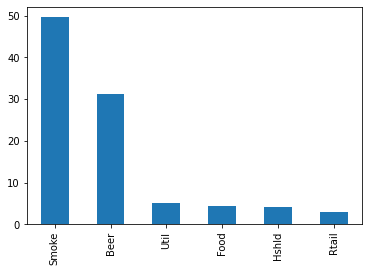

In [6]:
weights.sort_values(ascending=False).head(6).plot.bar()

Contrast this to the results of a regression.

In [7]:
coeffs = utils.regress(mgr_r, ind).params*100
coeffs.sort_values().head()

Chems   -4.457085
Books   -3.293940
FabPr   -2.313812
Trans   -1.984285
Games   -1.961299
dtype: float64

<AxesSubplot:>

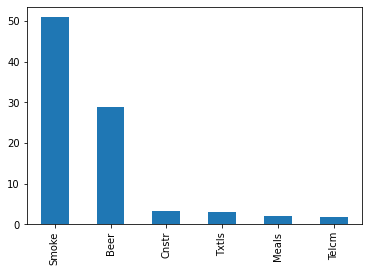

In [8]:
coeffs.sort_values(ascending=False).head(6).plot.bar()

# Warning: Potential Misuse of Style Analysis

Style Analysis works best when the explanatory indices are in fact a good specification of what is happening. For instance, it usually gives you very useful and revealing insight if you use a stock market index (such as SPY) and other broad indices, ETFs or mutual funds (such as a Value Fund, a Growth Fund, an International Fund, a Bond Fund etc).

Part of the skill in extracting meaningful results is to pick the right set of explanatory variables.

However, a part of the challenge with Style Analysis is that it will _always_ return a portfolio. Although it is possible to develop a figure of merit of fit quality similar to an $R^2$, it will still always give you an answer, however unreasonable it might be, and it's not always obvious how much one can rely on the result.